# TensorFlow Notebook

## Applications

### Data Preparation

- https://colab.research.google.com/drive/1qe6yCynKyUoQ_O84OkynVKUgAegqembI
    - download, move, delete files with os, shutil, and bash commands
    - tensorflow.keras.preprocessing.image
        - ImageDataGenerator
        - img_to_array, array_to_img, load_img

#### Transfer Learning
- https://colab.research.google.com/drive/1JGWdKozbc3dbRzFUtqqCLXbnsFg7EPtv
    - Transfer learning
    - Data augmentation and preprocessing by ImageDataGenerator


#### Object Localization/Detection and Image Classification/Segmentation

- https://colab.research.google.com/drive/12YB0Nmy0lFhZzw_ZBdb4gkBmbAc0qGce#scrollTo=qhdz68Xm3Z4Z
- https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/3-Advance_computer_vision/week%20-1/C3W1_Assignment.ipynb
    - Object detection (1. link)
    - Object Localization (2.link)
    - Transfer learning
    - Data preprocessing based on tf.dataset
    - Visualization of bounding boxes and predictions
    - iou
- https://colab.research.google.com/drive/1-jGcGcijVo4FG1doxn30_yaYDzusT9Ow
    - Object detection API
    - image preprocessing
    - transfer learning
        - Loading model and weiths from config and Checkpoint
    - custom training
- https://colab.research.google.com/drive/1gvdFXG7ZyPlE_VRmUMPNcQw6wRoCf-h-#scrollTo=NSFfcSDxhIS7
    - Fully Convolutional Neural Networks for Image Segmentation
- https://colab.research.google.com/drive/1gNWwhdlkcuoh8M2KGbwi017V9gSHoNjH?usp=sharing
    - image segmentation
    - FCN8
- https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/3-Advance_computer_vision/week-4/C3_W4_Lab_1_FashionMNIST_CAM.ipynb
    - Class Activation Map (CAM) in detail
    - Visulization for CAM
- https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/3-Advance_computer_vision/week-4/C3_W4_Lab_3_Saliency.ipynb
    - Saliency in detail
    - superimpose in cv2
- https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/3-Advance_computer_vision/week-4/C3_W4_Lab_4_GradCam.ipynb
    - GradCAM
    - apply heatmap in cv2

#### Autoencoder

- https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/4-Generative-deeplearning-with-tensorflow/week-2/C4W2_Assignment.ipynb  
    - autoencoder in functional API and Sequential API
    - convolutional autoencoder and its visualization  
- https://colab.research.google.com/drive/1VKb4mAz529EjeVhR3XT2smx_kwmwfIWs#scrollTo=5eZsrZtqJOzv  
    - Variational Autoencoder (VAE)
    

#### GAN

- https://colab.research.google.com/drive/1oLFwysBR8l5TSN4Hnh5XOY7sPtOYKpVT
    - Generalization by gradient penalty
    - TPU
    - Distributed Training
- https://colab.research.google.com/drive/11KqBmfEzfP6Pqb9-sCEvz4XiQVXIGuVH
    - detailed comments

## Basics


### Input Layer

- Meaning of None & Why don't need Batch size  
https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/lecture/wNWnn/outputting-a-sequence

- Input_shape vs Input_dim  
https://stackoverflow.com/questions/53106111/in-keras-when-should-i-use-input-shape-instead-of-input-dim


### Layer Output

In [ ]:
# output of each layer in a list
# https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer
outputs = [layer.output for layer in model.layers] 

### An Simple Explanation of RNN and its Implementation in TensorFlow

https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/lecture/blByn/conceptual-overview  
https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/lecture/fP3ND/shape-of-the-inputs-to-the-rnn  
https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/lecture/wNWnn/outputting-a-sequence  


### An Example of Stacking CNN and RNN

- Video:  
https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/lecture/Ob5GY/bi-directional-lstms


- Code:  
https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP%20Week%204%20Lesson%201.ipynb

### tf.dataset

#### .batch(), .unbatch(), .take

In [16]:
import tensorflow as tf
dataset = tf.data.Dataset.range(8)
dataset = dataset.batch(3)
list(dataset.as_numpy_iterator())

[array([0, 1, 2], dtype=int64),
 array([3, 4, 5], dtype=int64),
 array([6, 7], dtype=int64)]

In [17]:
ds = dataset.unbatch()
list(ds.as_numpy_iterator())

[0, 1, 2, 3, 4, 5, 6, 7]

In [19]:
ds = dataset.unbatch().batch(8)
for elem in ds.take(1):
    print(elem)

#### Show element(s) of tf.dataset

In [24]:
# Take a look at a single batch from the train_dist_dataset (a tf.dataset instance)
x = iter(train_dist_dataset).get_next()

print(f"x is a tuple that contains {len(x)} values ")
print(f"x[0] contains the features, and has shape {x[0].shape}")
print(f"  so it has {x[0].shape[0]} examples in the batch, each is an image that is {x[0].shape[1:]}")
print(f"x[1] contains the labels, and has shape {x[1].shape}")

In [ ]:
# train_dataset is a tf.dataset instance

## show 1 element
for elem in train_dataset.take(1):
  print (elem)

## show 1 element
elem = next(iter(train_dataset))

## show elements (batchwise)
list(iter(train_dataset))

## show all elements (batchwise)
for elem in tfds.as_numpy(dataset):
  print(elem)

## each element of the dataset contains (images,labels)
def dataset_to_numpy_util(dataset, N):
  dataset = dataset.batch(N)
  
  if tf.executing_eagerly():
    # In eager mode, iterate in the Datset directly.
    for images, labels in dataset:
      numpy_images = images.numpy()
      numpy_labels = labels.numpy()
      break;
      
  else: # In non-eager mode, must get the TF note that 
        # yields the nextitem and run it in a tf.Session.
    get_next_item = dataset.make_one_shot_iterator().get_next()
    with tf.Session() as ses:
      numpy_images, numpy_labels = ses.run(get_next_item)

  return numpy_images, numpy_labels

## each element of the dataset contains (images,coordinates of bounding boxes)
def dataset_to_numpy_util(dataset, batch_size=0, N=0):

    # eager execution: loop through datasets normally
    take_dataset = dataset.shuffle(1024)

    if batch_size > 0:
        take_dataset = take_dataset.batch(batch_size)
  
    if N > 0:
        take_dataset = take_dataset.take(N)
  
    if tf.executing_eagerly():
        ds_images, ds_bboxes = [], []
        for images, bboxes in take_dataset:
            ds_images.append(images.numpy())
            ds_bboxes.append(bboxes.numpy())
        
    return (np.array(ds_images), np.array(ds_bboxes))

#### Example 1

In [1]:
# Example 1
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds

train_data, info = tfds.load("fashion_mnist", split = "train", with_info = True, data_dir='./data/', download=False)
test_data = tfds.load("fashion_mnist", split = "test", data_dir='./data/', download=False)

class_names = ["T-shirt/top", "Trouser/pants", "Pullover shirt", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def format_image(data):        
    image = data["image"]
    image = tf.reshape(image, [-1])
    image = tf.cast(image, 'float32')
    image = image / 255.0
    return image, data["label"]

train_data = train_data.map(format_image)
test_data = test_data.map(format_image)

batch_size = 64
train = train_data.shuffle(buffer_size=1024).batch(batch_size)
test =  test_data.batch(batch_size=batch_size)

train

<BatchDataset shapes: ((None, 784), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
#Iterate through all batches of training data
for step, (x_batch_train, y_batch_train) in enumerate(train):
    pass

In [ ]:
# inference using tf.dataset
est_inputs = test_data.batch(batch_size=1000001)
x_batches, y_pred_batches, y_true_batches = [], [], []

for x, y in test_inputs:
  y_pred = model(x) # Codes for model are omitted here. See full codes in https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/2-custom_and_distributed_training/week-2/C2_W2_Lab_2_training-categorical.ipynb
  y_pred_batches = y_pred.numpy()
  y_true_batches = y.numpy()
  x_batches = x.numpy()

indexes = np.random.choice(len(y_pred_batches), size=10)
images_to_plot = x_batches[indexes]
y_pred_to_plot = y_pred_batches[indexes]
y_true_to_plot = y_true_batches[indexes]

#### Example 2

from pandas to tf.dataset, see the beginning of   
https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/2-custom_and_distributed_training/week-2/C2W2_Assignment.ipynb



In [ ]:
# Example 3
# https://colab.research.google.com/drive/1WlqcLW5cnH5DJ3nEmjJhcnbCJVktS2pM#scrollTo=_tRPCjI9YxKN

# URI of the dataset in Goocle Cloud Storage
GCS_BASE_DIR = "gs://celeb_a_dataset/"
# Load the data using TFDS
data, data_info = tfds.load("celeb_a", data_dir=GCS_BASE_DIR, with_info=True, builder_kwargs={'version':'2.0.0'})
# Take 6 examples and preview images
fig = tfds.show_examples(data['train'].take(6), data_info)
# Take 4 examples as a dataframe
df = tfds.as_dataframe(data['train'].take(4), data_info)

#### train validation test split

In [ ]:
# full code: https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/2-custom_and_distributed_training/week-3/C2W3_Assignment.ipynb

splits, info = tfds.load('horses_or_humans', as_supervised=True, with_info=True, split=['train[:80%]', 'train[80%:]', 'test'], data_dir='./data')

(train_examples, validation_examples, test_examples) = splits

num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

### tf.image

In [ ]:
# Data Preparation Utilities
# https://colab.research.google.com/drive/1VKb4mAz529EjeVhR3XT2smx_kwmwfIWs#scrollTo=iGoCJ6DPJHL8

def get_dataset_slice_paths(image_dir):
  '''returns a list of paths to the image files'''
  image_file_list = os.listdir(image_dir)
  image_paths = [os.path.join(image_dir, fname) for fname in image_file_list]

  return image_paths


def map_image(image_filename):
  '''preprocesses the images'''
  img_raw = tf.io.read_file(image_filename)
  image = tf.image.decode_jpeg(img_raw)

  image = tf.cast(image, dtype=tf.float32)
  image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
  image = image / 255.0  
  image = tf.reshape(image, shape=(IMAGE_SIZE, IMAGE_SIZE, 3,))

  return image

# load the training image paths into tensors, create batches and shuffle
training_dataset = tf.data.Dataset.from_tensor_slices((train_paths))
training_dataset = training_dataset.map(map_image)
training_dataset = training_dataset.shuffle(1000).batch(BATCH_SIZE)

In [ ]:
# https://colab.research.google.com/drive/1fYFqo0i7gLEm1DnWw8xPBsGU1Pn6PZls#scrollTo=3TLljcwv5qZs

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K

from imageio import mimsave
from IPython.display import display as display_fn
from IPython.display import Image, clear_output

def tensor_to_image(tensor):
  '''converts a tensor to an image'''
  tensor_shape = tf.shape(tensor)
  number_elem_shape = tf.shape(tensor_shape)
  if number_elem_shape > 3:
    assert tensor_shape[0] == 1
    tensor = tensor[0]
  return tf.keras.preprocessing.image.array_to_img(tensor) 


def load_img(path_to_img):
  '''loads an image as a tensor and scales it to 512 pixels'''
  max_dim = 512
  image = tf.io.read_file(path_to_img)
  image = tf.image.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)

  shape = tf.shape(image)[:-1]
  shape = tf.cast(tf.shape(image)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  image = tf.image.resize(image, new_shape)
  image = image[tf.newaxis, :]
  image = tf.image.convert_image_dtype(image, tf.uint8)

  return image


def load_images(content_path, style_path):
  '''loads the content and path images as tensors'''
  content_image = load_img("{}".format(content_path))
  style_image = load_img("{}".format(style_path))

  return content_image, style_image


def imshow(image, title=None):
  '''displays an image with a corresponding title'''
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)
    
    
def show_images_with_objects(images, titles=[]):
  '''displays a row of images with corresponding titles'''
  if len(images) != len(titles):
    return

  plt.figure(figsize=(20, 12))
  for idx, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1, len(images), idx + 1)
    plt.xticks([])
    plt.yticks([])
    imshow(image, title)

def display_gif(gif_path):
  '''displays the generated images as an animated gif'''
  with open(gif_path,'rb') as f:
    display_fn(Image(data=f.read(), format='png'))


def create_gif(gif_path, images):
  '''creates animation of generated images'''
  mimsave(gif_path, images, fps=1)
  
  return gif_path


def clip_image_values(image, min_value=0.0, max_value=255.0):
  '''clips the image pixel values by the given min and max'''
  return tf.clip_by_value(image, clip_value_min=min_value, clip_value_max=max_value)


def preprocess_image(image):
  '''centers the pixel values of a given image to use with VGG-19'''
  image = tf.cast(image, dtype=tf.float32)
  image = tf.keras.applications.vgg19.preprocess_input(image)

  return image

In [ ]:
# https://colab.research.google.com/drive/11KqBmfEzfP6Pqb9-sCEvz4XiQVXIGuVH#scrollTo=4rf-e4f-d3H7

BATCH_SIZE = 32

# mapping function for preprocessing the image files
def map_images(file):
  '''converts the images to floats and normalizes the pixel values'''
  img = tf.io.decode_png(tf.io.read_file(file))
  img = tf.dtypes.cast(img, tf.float32)
  img = img / 255.0
  
  return img

# create training batches
filename_dataset = tf.data.Dataset.list_files("/tmp/signs-training/*.png")
image_dataset = filename_dataset.map(map_images).batch(BATCH_SIZE)

### tf.keras.losses

#### SparseCategoricalCrossentropy vs CategoricalCrossentropy

https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy  

SparseCategoricalCrossentropy expects labels to be provided as integers. If you want to provide labels using one-hot representation, please use CategoricalCrossentropy loss.

### Gradient Tape

- Videos:
    - https://www.coursera.org/learn/custom-distributed-training-with-tensorflow/lecture/N7AHG/gradient-
    - https://www.coursera.org/learn/custom-distributed-training-with-tensorflow/lecture/qD1oo/gradient-descent-using-gradient-tape
- Code:
    - https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/2-custom_and_distributed_training/week-1/C2_W1_Lab_2_gradient-tape-basics.ipynb


In [ ]:
# An very simple example
"""
Args:
    x (EagerTensor): a tensor.

Returns:
    EagerTensor: Derivative of z with respect to the input tensor x.
"""
with tf.GradientTape() as t:
    
    # Record the actions performed on tensor x with `watch`
    t.watch(x)   

    # Define a polynomial of form 3x^3 - 2x^2 + x
    y = 3*(x**3) - 2*(x**2) + x 

    # Obtain the sum of the elements in variable y
    z = tf.reduce_sum(y) 

# Get the derivative of z with respect to the original input tensor x
dz_dx = t.gradient(z,x)

In [3]:
# use Gradient Tape for custom training loop
def apply_gradient(optimizer, loss_object, model, x, y):
    '''
    applies the gradients to the trainable model weights
    
    Args:
        optimizer: optimizer to update model weights
        loss_object: type of loss to measure during training
        model: the model we are training
        x: input data to the model
        y: target values for each input
    '''
    
    with tf.GradientTape() as tape:
    ### START CODE HERE ###
        logits = model(x) 
        loss_value = loss_object(y_true = y, y_pred = logits)
  
    gradients = tape.gradient(loss_value , model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights)) 
    ### END CODE HERE ###
  
    return logits, loss_value

### Callback

- Bulit-in callbacks:
    - Tensorboard, ModelCheckpoint, EarlyStopping, CSVLogger
        - Video:   
        https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow/lecture/Qk2yU/built-in-callbacks
        - Code:  
        https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/1-custom_models_layers_losses/week-5/C1_W5_Lab_1_exploring-callbacks.ipynb
        
- Custom callbacks
    - Video:  
    https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow/lecture/1NR1C/custom-callbacks
    - Code:  
    https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/1-custom_models_layers_losses/week-5/C1_W5_Lab_2_custom-callbacks.ipynb
        

In [ ]:
# an old but very simple example of cumstom callback
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

### AutoGraph

https://www.coursera.org/learn/custom-distributed-training-with-tensorflow/lecture/dzCTY/benefits-of-graph-mode

https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/2-custom_and_distributed_training/week-3/C2W3_Assignment.ipynb

### tf.metrics

In [2]:
# method update_state(), result(), reset_state()
import tensorflow as tf

mean_object = tf.metrics.Mean()
values = [1, 2, 3, 4, 5]

for ix, val in enumerate(values):
    mean_object.update_state(val) # equivalent to mean_object(val)
    print(mean_object.result().numpy(), 'is the mean of', values[:ix+1])
print("reset:")
mean_object.reset_states()
print(mean_object.result().numpy())

1.0 is the mean of [1]
1.5 is the mean of [1, 2]
2.0 is the mean of [1, 2, 3]
2.5 is the mean of [1, 2, 3, 4]
3.0 is the mean of [1, 2, 3, 4, 5]
reset:
0.0


## Customization

### Functional API and Custom Models

- Functional API for multiple outputs or inputs:  
https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/tree/main/1-custom_models_layers_losses/week-1

-  Model subclassing (Customizing models as Model class)

    - Overall  
        - https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow/lecture/CumBB/coding-a-wide-and-deep-model
    - ResNet Implementation
        - https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow/lecture/33xkF/coding-a-residual-network-with-the-model-class
        -    https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/1-custom_models_layers_losses/week-4/C1_W4_Lab_2_resnet-example.ipynb


### Custom Layers
- Lambda layer
    - https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow/ungradedLab/AFDgQ/lambda-layer
    - https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/lecture/I0K6b/lambda-layers
- Cumstom layers
    - https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow/ungradedLab/laUcE/custom-dense-layer

### Custom Loss Function

Examples:
-   as Function:
    -   https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow/lecture/wJIqv/adding-hyperparameters-to-custom-loss-functions
-   as Class
    -   https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow/lecture/FS2QA/turning-loss-functions-into-classes

### Custom Training
- Processes:  
    1. Prepare datasets 
    2. Define Model, Optimizer, Loss and Metrics
    3. Define the Function to Apply Gradients
    4. Establish Training Loop
        1. Perform training over all batches of training data.
        2. Get values of metrics.
        3. Perform validation to calculate loss and update validation metrics on test data.
        4. Reset the metrics at the end of epoch.
        5. Display statistics at the end of each epoch.
    5. Evalutate the Model  
<Br>
- Codes:  
    - https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/2-custom_and_distributed_training/week-2/C2_W2_Lab_1_training-basics.ipynb
    - https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/2-custom_and_distributed_training/week-2/C2_W2_Lab_2_training-categorical.ipynb
    - https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/2-custom_and_distributed_training/week-2/C2W2_Assignment.ipynb

## Visualization

### An layer-by-layer visualization example

https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%203%20-%20Notebook.ipynb#scrollTo=-8EHQyWGDvWz

### Keras plot_model

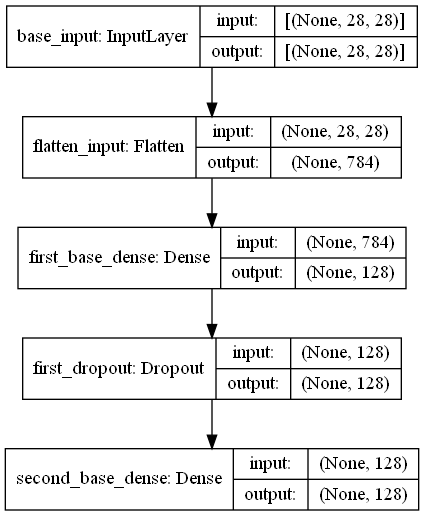

In [2]:
from tensorflow.python.keras.utils.vis_utils import plot_model

from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.models import Model
def initialize_base_network():
    input = Input(shape=(28,28,), name="base_input")
    x = Flatten(name="flatten_input")(input)
    x = Dense(128, activation='relu', name="first_base_dense")(x)
    x = Dropout(0.1, name="first_dropout")(x)
    x = Dense(128, activation='relu', name="second_base_dense")(x)
#     x = Dropout(0.1, name="second_dropout")(x)
#     x = Dense(128, activation='relu', name="third_base_dense")(x)
    return Model(inputs=input, outputs=x)
base_network = initialize_base_network()

plot_model(
    base_network, show_shapes=True, show_layer_names=True #, to_file='base-model.png'
)

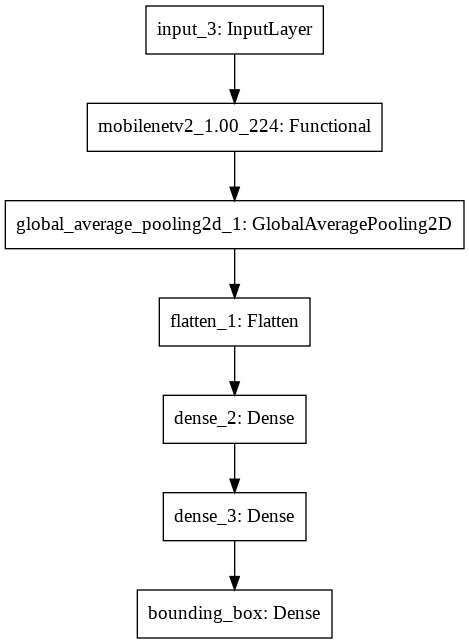

In [25]:
# 
tf.keras.utils.plot_model(model) 

### for cifar10

In [ ]:
# extracted from https://colab.research.google.com/drive/1cBsrEczhHzbWawrlNLVL9p9b-7-A68nh#scrollTo=UiokWTuKo88c
#cifar10
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#  Visualization Utilities[RUN ME]
#Matplotlib config
plt.rc('image', cmap='gray')
plt.rc('grid', linewidth=0)
plt.rc('xtick', top=False, bottom=False, labelsize='large')
plt.rc('ytick', left=False, right=False, labelsize='large')
plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
plt.rc('text', color='a8151a')
plt.rc('figure', facecolor='F0F0F0')# Matplotlib fonts
MATPLOTLIB_FONT_DIR = os.path.join(os.path.dirname(plt.__file__), "mpl-data/fonts/ttf")
# utility to display a row of digits with their predictions
def display_images(digits, predictions, labels, title):

  n = 10

  indexes = np.random.choice(len(predictions), size=n)
  n_digits = digits[indexes]
  n_predictions = predictions[indexes]
  n_predictions = n_predictions.reshape((n,))
  n_labels = labels[indexes]
 
  fig = plt.figure(figsize=(20, 4))
  plt.title(title)
  plt.yticks([])
  plt.xticks([])

  for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    class_index = n_predictions[i]
    
    plt.xlabel(classes[class_index])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(n_digits[i])

# utility to display training and validation curves
def plot_metrics(metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.plot(history.history[metric_name],color='blue',label=metric_name)
  plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

(training_images, training_labels) , (validation_images, validation_labels) = tf.keras.datasets.cifar10.load_data()
display_images(training_images, training_labels, training_labels, "Training Data" )

## Quantization and Pruning

- https://colab.research.google.com/drive/1w-2V89seC3emt_sp68tMtco87AdzqwxM#scrollTo=OQFkh5ukiiZE
    * post-training quantization
    * quantization aware training
    * weight pruning

## System

### Out-of-memory Solution:

In [1]:
# to have TensorFlow start out using only a minimum amount of memory and then allocate more as needed
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

## Distributed Training 

### Mirrored Strategy

Example:  
https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/2-custom_and_distributed_training/week-4/C2W4_Assignment.ipynb

### on TPU

Example:  
https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/blob/main/2-custom_and_distributed_training/week-4/C2_W4_Lab_3_using-TPU-strategy.ipynb

## Deployment

- https://github.com/https-deeplearning-ai/MLEP-public/blob/main/course1/week1-ungraded-lab/server.ipynb
    - object detection with cvlib
    - deploy the model to a server using fastAPI for API and uvicon for server
    - interaction with 
        - UI: this ipynb
        - code (python requests): https://github.com/https-deeplearning-ai/MLEP-public/blob/main/course1/week1-ungraded-lab/server.ipynb